In [1]:
# Initial Setup.
import pandas as pd
import re
import numpy as np
import math
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Mastodon_SaiGinny/'

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 1000)


Mounted at /content/gdrive


In [2]:
import os
import pandas as pd

main_folder_path =path + 'datadump'
data = []

for root, dirs, files in os.walk(main_folder_path):
    for file in files:
        if file == 'csv.csv':
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            df['directory'] = os.path.basename(root)
            data.append(df)
data_total= pd.concat(data, ignore_index=True)
data_total['directory'] = pd.to_datetime(data_total['directory'], format='%Y%m%d%H%M', errors='coerce')
data_total.dropna(subset=['directory'], inplace=True)

data_total['last_status_at'] = pd.to_datetime(data_total['last_status_at'], format='%Y-%m-%d', errors='coerce')
data_total.dropna(subset=['last_status_at'], inplace=True)
output_path = path + 'concatenated.csv'
data_total.to_csv(output_path, index=False)

print(f"Concatenated CSV file saved to {output_path}")


Concatenated CSV file saved to /content/gdrive/My Drive/Mastodon_SaiGinny/concatenated.csv


In [ ]:
data_total.columns

Index(['Unnamed: 0', 'id', 'username', 'acct', 'display_name', 'locked', 'bot', 'discoverable', 'group', 'created_at', 'note', 'url', 'avatar', 'avatar_static', 'header', 'header_static', 'followers_count', 'following_count', 'statuses_count', 'last_status_at', 'emojis', 'fields', 'idx', 'noindex', 'moved', 'suspended', 'limited', 'directory', 'roles', 'uri'], dtype='object')

In [ ]:
data_total.tail()

,Unnamed: 0,id,username,acct,display_name,locked,bot,discoverable,group,created_at,note,url,avatar,avatar_static,header,header_static,followers_count,following_count,statuses_count,last_status_at,emojis,fields,idx,noindex,moved,suspended,limited,directory,roles,uri
590019,10840,962513,digitaldutta,digitaldutta@freeradical.zone,Srinivas Kodali,False,False,True,False,2019-11-07T00:00:00.000Z,"<p>Researcher working on data, governance &amp; internet. Openness, Maps, Cities, తెలుగు Poetry 😍.</p>",https://freeradical.zone/@digitaldutta,https://files.mastodon.social/cache/accounts/avatars/000/962/513/original/c9e63b4dcfbd5029.jpg,https://files.mastodon.social/cache/accounts/avatars/000/962/513/original/c9e63b4dcfbd5029.jpg,https://files.mastodon.social/cache/accounts/headers/000/962/513/original/84966efc2caccf7d.jpeg,https://files.mastodon.social/cache/accounts/headers/000/962/513/original/84966efc2caccf7d.jpeg,1391,413,1140,2023-10-03,[],[],10846,NaN,NaN,NaN,NaN,202310270748,NaN,https://freeradical.zone/users/digitaldutta
590020,10841,"0 1.111110e+54\nName: id, dtype: float64","0 default\nName: username, dtype: object","0 default\nName: acct, dtype: object","0 default\nName: display_name, dtype: object","0 False\nName: locked, dtype: bool","0 False\nName: bot, dtype: bool","0 True\nName: discoverable, dtype: bool","0 False\nName: group, dtype: bool","0 1999-11-11T00:00:00.000Z\nName: created_at, dtype: object","0 <p>Zweigmuseum des archäologischen Landesmuseu...\nName: note, dtype: object","0 https://xn--baw-joa.social/@roemerhaus\nName: url, dtype: object","0 https://files.mastodon.social/cache/accounts/a...\nName: avatar, dtype: object","0 https://files.mastodon.social/cache/accounts/a...\nName: avatar_static, dtype: object","0 https://files.mastodon.social/cache/accounts/h...\nName: header, dtype: object","0 https://files.mastodon.social/cache/accounts/h...\nName: header_static, dtype: object","0 67\nName: followers_count, dtype: int64","0 21\nName: following_count, dtype: int64","0 18\nName: statuses_count, dtype: int64","0 11/22/2022\nName: last_status_at, dtype: object","0 []\nName: emojis, dtype: object","0 [{'name': '🌐 Web', 'value': '<a href=""https://...\nName: fields, dtype: object","0 10849\nName: idx, dtype: int64",NaN,NaN,NaN,NaN,202310270748,NaN,NaN
590021,10842,752655,wendyg,wendyg@mastodon.xyz,Wendy M. Grossman,False,False,True,False,2019-03-10T00:00:00.000Z,"<p>Freelance writer specializing in the intersection of computers, freedom, and privacy, aka ""net.wars"". Contributing editor, Plutopia News Network podcast. New &lt;a href=""<a href=""https://netwars.pelicancrossing.net"" rel=""nofollow noopener noreferrer"" translate=""no"" target=""_blank""><span class=""invisible"">https://</span><span class="""">netwars.pelicancrossing.net</span><span class=""invisible""></span></a>""&gt;new net.wars&lt;/a&gt; every Friday (<a href=""https://mastodon.xyz/tags/NetWars"" class=""mention hashtag"" rel=""nofollow noopener noreferrer"" target=""_blank"">#<span>NetWars</span></a>). Founder The Skeptic (UK). Folksinger. See <a href=""https://www.pelicancrossing.net"" rel=""nofollow noopener noreferrer"" translate=""no"" target=""_blank""><span class=""invisible"">https://www.</span><span class="""">pelicancrossing.net</span><span class=""invisible""></span></a> for more. also <span class=""h-card"" translate=""no""><a href=""https://mastodon.xyz/@wendyg"" class=""u-url mention"" rel=""nofollow noo...",https://mastodon.xyz/@wendyg,https://files.mastodon.social/cache/accounts/avatars/000/752/655/original/a82e2640d7ae4917.jpg,https://files.mastodon.social/cache/accounts/avatars/000/752/655/original/a82e2640d7ae4917.jpg,https://files.mastodon.social/cache/accounts/headers/000/752/655/original/9c892c6325c2b1ec.jpg,https://files.mastodon.social/cache/accounts/headers/000/752/655/original/9c892c6325c2b1ec.jpg,1313,469,764,2023-10-25,[],"[{'name': 'Profession', 'value': 'freelance writer', 'verified_at': None}, {'name': 'Based', 'value

In [ ]:
data_test=data_total.loc[data_total['username']=='anaivas']


In [ ]:
data_test.tail()

,Unnamed: 0,id,username,acct,display_name,locked,bot,discoverable,group,created_at,note,url,avatar,avatar_static,header,header_static,followers_count,following_count,statuses_count,last_status_at,emojis,fields,idx,noindex,moved,suspended,limited,directory,roles,uri
340344,3,109320681408432563,Anarchopology,Anarchopology@kolektiva.social,Anarchopology,False,False,False,False,2022-11-10T00:00:00.000Z,<p>Anarchist. Abolish Business Improvement Districts(BIDs)🧨 Housing Ends Homelessness 🏠</p>,https://kolektiva.social/@Anarchopology,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://mastodon.social/headers/original/missing.png,https://mastodon.social/headers/original/missing.png,491,188,220,2023-05-10,[],[],1,NaN,NaN,NaN,NaN,202306050813,NaN,NaN
351202,3,109320681408432563,Anarchopology,Anarchopology@kolektiva.social,Anarchopology,False,False,False,False,2022-11-10T00:00:00.000Z,<p>Anarchist. Abolish Business Improvement Districts(BIDs)🧨 Housing Ends Homelessness 🏠</p>,https://kolektiva.social/@Anarchopology,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://mastodon.social/headers/original/missing.png,https://mastodon.social/headers/original/missing.png,493,188,220,2023-05-10,[],[],1,NaN,NaN,NaN,NaN,202306091255,NaN,NaN
362060,3,109320681408432563,Anarchopology,Anarchopology@kolektiva.social,Anarchopology,False,False,False,False,2022-11-10T00:00:00.000Z,<p>Anarchist. Abolish Business Improvement Districts(BIDs)🧨 Housing Ends Homelessness 🏠</p>,https://kolektiva.social/@Anarchopology,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://mastodon.social/headers/original/missing.png,https://mastodon.social/headers/original/missing.png,493,188,220,2023-05-10,[],[],1,NaN,NaN,NaN,NaN,202306150654,NaN,NaN
372918,3,109320681408432563,Anarchopology,Anarchopology@kolektiva.social,Anarchopology,False,False,False,False,2022-11-10T00:00:00.000Z,<p>Anarchist. Abolish Business Improvement Districts(BIDs)🧨 Housing Ends Homelessness 🏠</p>,https://kolektiva.social/@Anarchopology,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://mastodon.social/headers/original/missing.png,https://mastodon.social/headers/original/missing.png,493,188,220,2023-05-10,[],[],1,NaN,NaN,NaN,NaN,202306221510,NaN,NaN
383776,3,109320681408432563,Anarchopology,Anarchopology@kolektiva.social,Anarchopology,False,False,False,False,2022-11-10T00:00:00.000Z,<p>Anarchist. Abolish Business Improvement Districts(BIDs)🧨 Housing Ends Homelessness 🏠</p>,https://kolektiva.social/@Anarchopology,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/aafad691e5c274aa.png,https://mastodon.social/headers/original/missing.png,https://mastodon.social/headers/original/missing.png,493,188,220,2023-05-10,[],[],1,NaN,NaN,NaN,NaN,202306301702,NaN,NaN


<ipython-input-22-1bb821e2b78f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['directory'] = pd.to_datetime(data_test['directory'], format='%Y%m%d%H%M')


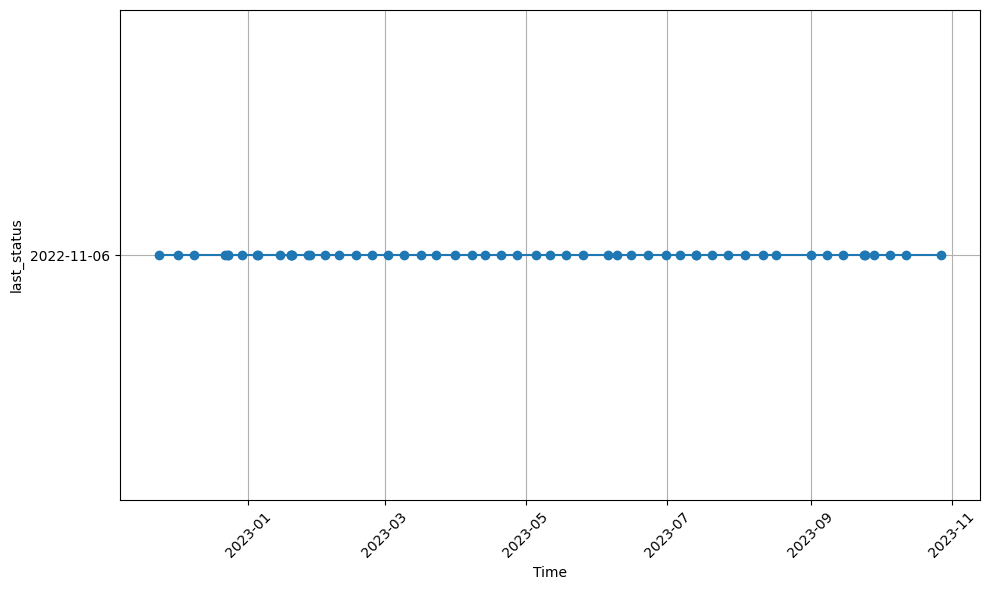

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_test['directory'] = pd.to_datetime(data_test['directory'], format='%Y%m%d%H%M')
plt.figure(figsize=(10, 6))
#plt.plot(data_test['directory'], data_test['statuses_count'], marker='o', linestyle='-')
plt.plot(data_test['directory'], data_test['last_status_at'], marker='o', linestyle='-')
#plt.plot(data_test['directory'], data_test['followers_count'], marker='o', linestyle='-')
#plt.plot(data_test['directory'], data_test['following_count'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('last_status')
#plt.title('xxx')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


  3%|▎         | 219/8574 [00:15<08:09, 17.06it/s]<ipython-input-28-de569b8146e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data_resampled['user'] = user
  3%|▎         | 241/8574 [00:17<15:33,  8.93it/s]<ipython-input-28-de569b8146e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data_resampled['user'] = user
  3%|▎         | 259/8574 [00:21<23:30,  5.90it/s]<ipython-input-28-de569b8146e6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


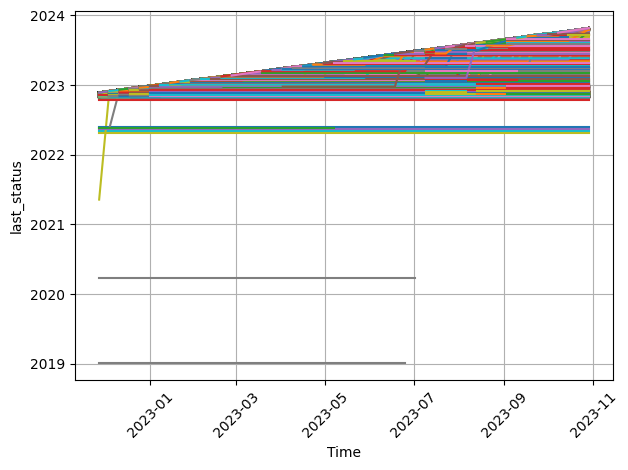

In [ ]:
from tqdm import tqdm

unique_users = data_total['acct'].unique()
#unique_users = data_total.loc[data_total['username']!='kerim']['username'].unique()
data_total['directory'] = pd.to_datetime(data_total['directory'], format='%Y%m%d%H%M')
aggregate=pd.DataFrame()
for user in tqdm(unique_users):
    user_data = data_total[data_total['acct'] == user].copy()
    #user_data['last_status_at'] = pd.to_datetime(user_data['last_status_at'], format='%Y-%m-%d', errors='coerce')
    #user_data = user_data.dropna(subset=['last_status_at'])
    #user_data['last_status_at'] = user_data['last_status_at'].dt.to_period('w').dt.to_timestamp()

    #user_data = user_data.loc[user_data['last_status_at']!="nan"]
    #user_data['last_status_at'] = pd.to_numeric(user_data['last_status_at'], errors='coerce')
    user_data.set_index('directory', inplace=True)
    user_data_resampled = user_data.resample('w').agg({'last_status_at': 'max'})
    user_data_resampled = user_data_resampled.dropna(subset=['last_status_at'])
    user_data_resampled['user'] = user
    aggregate = pd.concat([aggregate, user_data_resampled])
    plt.plot(user_data_resampled.index, user_data_resampled['last_status_at'], linestyle='-', label=user)
plt.xlabel('Time')
plt.ylabel('last_status')
#plt.title('xxx')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

100%|██████████| 1/1 [00:00<00:00,  4.13it/s]


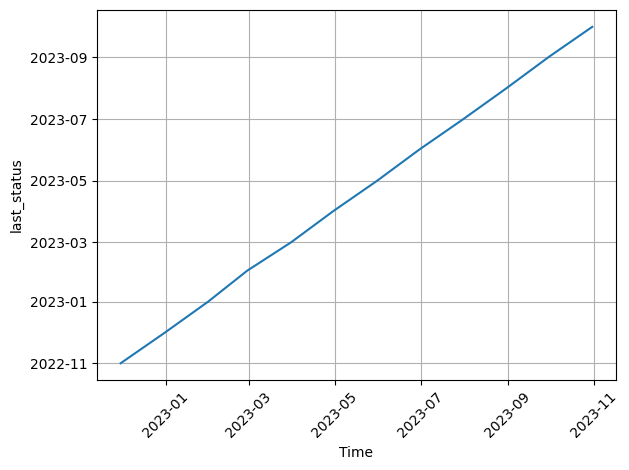

In [ ]:
from tqdm import tqdm

#unique_users = data_total['id'].unique()
unique_users = data_total.loc[data_total['username']=='kerim']['username'].unique()
data_total['directory'] = pd.to_datetime(data_total['directory'], format='%Y%m%d%H%M')
aggregate=pd.DataFrame()
for user in tqdm(unique_users):
    user_data = data_total[data_total['username'] == user].copy()
    user_data['last_status_at'] = pd.to_datetime(user_data['last_status_at'], format='%Y-%m-%d', errors='coerce')
    user_data = user_data.dropna(subset=['last_status_at'])
    user_data['last_status_at'] = user_data['last_status_at'].dt.to_period('M').dt.to_timestamp()

    #user_data = user_data.loc[user_data['last_status_at']!="nan"]
    #user_data['last_status_at'] = pd.to_numeric(user_data['last_status_at'], errors='coerce')
    user_data.set_index('directory', inplace=True)
    user_data_resampled = user_data.resample('M').agg({'last_status_at': 'max'})
    user_data_resampled = user_data_resampled.dropna(subset=['last_status_at'])
    user_data_resampled['user'] = user
    aggregate = pd.concat([aggregate, user_data_resampled])
    plt.plot(user_data_resampled.index, user_data_resampled['last_status_at'], linestyle='-', label=user)
plt.xlabel('Time')
plt.ylabel('last_status')
#plt.title('xxx')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
aggregate.reset_index(inplace=True)

In [ ]:
aggregate.directory.value_counts()

directory
2023-04-09    8270
2023-04-02    8262
2023-03-19    8260
2023-04-30    8245
2023-04-16    8244
2023-04-23    8239
2023-03-26    8229
2023-02-05    8223
2023-06-11    8219
2023-01-29    8217
2023-05-07    8215
2023-05-14    8214
2023-02-19    8203
2023-05-21    8203
2023-07-16    8202
2023-05-28    8198
2023-06-18    8196
2023-08-06    8189
2023-07-30    8188
2023-07-23    8186
2023-07-02    8174
2023-06-25    8172
2023-08-13    8162
2023-09-24    8162
2023-08-20    8159
2023-02-26    8155
2023-09-17    8151
2023-09-10    8148
2023-01-22    8145
2023-10-08    8143
2023-10-29    8138
2022-12-25    8119
2023-10-01    8116
2023-09-03    8110
2023-10-15    8103
2023-01-08    8101
2023-07-09    8054
2023-01-01    7996
2022-12-11    7856
2022-11-27    7855
2023-03-05    7819
2023-02-12    7691
2022-12-18    7441
2023-01-15    7334
2022-12-04    7204
2023-03-12    3476
Name: count, dtype: int64

In [ ]:
aggregate['last_status_at'].value_counts()

last_status_at
2022-11-20    5853
2022-11-23    5623
2022-11-21    5505
2022-11-22    5230
2022-11-18    5170
2022-11-19    4114
2022-12-01    3983
2022-12-22    3942
2022-11-08    3614
2022-12-21    3551
2022-12-14    3481
2022-11-07    3432
2022-12-07    3420
2022-12-20    3346
2022-12-19    3255
2023-01-19    3191
2023-01-04    3108
2022-12-23    3036
2022-12-16    2960
2022-12-29    2907
2022-11-29    2816
2022-11-28    2728
2022-11-30    2725
2023-01-27    2690
2022-11-11    2678
2023-01-13    2578
2023-01-31    2486
2022-11-27    2466
2022-11-12    2454
2023-01-05    2381
2022-11-10    2363
2022-11-06    2363
2022-11-24    2314
2022-12-08    2217
2023-01-26    2176
2023-02-08    2173
2022-12-13    2139
2022-12-18    2136
2022-11-09    2135
2022-12-17    2118
2023-02-02    2100
2022-12-12    2010
2022-12-24    2009
2023-02-15    1998
2023-03-01    1967
2022-12-06    1936
2023-07-06    1878
2023-01-25    1856
2022-12-05    1843
2022-11-26    1838
2023-01-18    1826
2023-01-09    18

In [ ]:
import seaborn as sns
#aggregate['last_status_at'] = aggregate['last_status_at'].dt.strftime('%Y-%m')
#aggregate['directory'] = aggregate['directory'].dt.strftime('%Y-%m')
count_matrix = pd.crosstab(aggregate['last_status_at'], aggregate['directory'])

plt.figure(figsize=(12, 8))
sns.heatmap(count_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Count Heatmap of Last Status At and Record Time')
plt.xlabel('directory_time')
plt.ylabel('Last Status At')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

KeyError: 'directory'

In [ ]:
data_total.head()

,Unnamed: 0,id,username,acct,display_name,locked,bot,discoverable,group,created_at,note,url,avatar,avatar_static,header,header_static,followers_count,following_count,statuses_count,last_status_at,emojis,fields,idx,noindex,moved,suspended,limited,directory,roles,uri
0,0,109320681408432563,Anarchopology,Anarchopology@kolektiva.social,Anarchopology,False,False,False,False,2022-11-10T00:00:00.000Z,<p>Anarchist. Abolish Business Improvement Districts(BIDs)🧨 Housing Ends Homelessness 🏠</p>,https://kolektiva.social/@Anarchopology,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/e44dfb981f4a89e3.png,https://files.mastodon.social/cache/accounts/avatars/109/320/681/408/432/563/original/e44dfb981f4a89e3.png,https://static-cdn.mastodon.social/headers/original/missing.png,https://static-cdn.mastodon.social/headers/original/missing.png,204,98,52,2022-11-22,[],[],1,NaN,NaN,NaN,NaN,2022-11-23 09:12:00,NaN,NaN
1,1,109292347780006776,anaivas,anaivas@mastodon.ie,Ana Ivasiuc,False,False,True,False,2022-11-05T00:00:00.000Z,"<p>Social anthropologist with a passion. Urban insecurity, race &amp; racism, Roma, far-right, policing, surveillance.</p><p>The header is from Ruth Behar, The Vulnerable Observer, 1996</p>",https://mastodon.ie/@anaivas,https://files.mastodon.social/cache/accounts/avatars/109/292/347/780/006/776/original/492a13110d9e2f58.jpg,https://files.mastodon.social/cache/accounts/avatars/109/292/347/780/006/776/original/492a13110d9e2f58.jpg,https://files.mastodon.social/cache/accounts/headers/109/292/347/780/006/776/original/000baf3f1eeff2fb.png,https://files.mastodon.social/cache/accounts/headers/109/292/347/780/006/776/original/000baf3f1eeff2fb.png,188,285,1,2022-11-06,[],[],0,NaN,NaN,NaN,NaN,2022-11-23 09:12:00,NaN,NaN
2,2,109287404708135353,anthrobirder,anthrobirder@mstdn.social,Andrew Whitehouse,False,False,True,False,2022-11-04T00:00:00.000Z,"<p>Anthropologist at University of Aberdeen. Quite interested in birds and post photos, mainly from Girdle Ness in Aberdeen. Work on human-bird relations and things to do with conservation.</p>",https://mstdn.social/@anthrobirder,https://files.mastodon.social/cache/accounts/avatars/109/287/404/708/135/353/original/2d354bae45221474.jpg,https://files.mastodon.social/cache/accounts/avatars/109/287/404/708/135/353/original/2d354bae45221474.jpg,https://files.mastodon.social/cache/accounts/headers/109/287/404/708/135/353/original/8cec30f9dc2e4a8c.jpg,https://files.mastodon.social/cache/accounts/headers/109/287/404/708/135/353/original/8cec30f9dc2e4a8c.jpg,204,134,15,2022-11-22,[],[],3,NaN,NaN,NaN,NaN,2022-11-23 09:12:00,NaN,NaN
3,3,109387309542862655,anibalarregui,anibalarregui@mastodon.world,Anibal Arregui,False,False,False,False,2022-11-19T00:00:00.000Z,<p>Anthropology of science</p>,https://mastodon.world/@anibalarregui,https://static-cdn.mastodon.social/avatars/original/missing.png,https://static-cdn.mastodon.social/avatars/original/missing.png,https://files.mastodon.social/cache/accounts/headers/109/387/309/542/862/655/original/322c590e8ccbbfbd.jpeg,https://files.mastodon.social/cache/accounts/headers/109/387/309/542/862/655/original/322c590e8ccbbfbd.jpeg,29,20,0,NaN,[],[],2,NaN,NaN,NaN,NaN,2022-11-23 09:12:00,NaN,NaN
4,4,109296046670778490,anthropam,anthropam@climatejustice.social,Pamela Cajilig,False,False,True,False,2022-11-06T00:00:00.000Z,"<p><a href=""https://climatejustice.social/tags/design"" class=""mention hashtag"" rel=""nofollow noopener noreferrer"" target=""_blank"">#<span>design</span></a> <a href=""https://climatejustice.social/tags/anthropology"" class=""mention hashtag"" rel=""nofollow noopener noreferrer"" target=""_blank"">#<span>anthropology</span></a> x <a href=""https://climatejustice.social/tags/disaster"" class=""mention hashtag"" rel=""nofollow noopener noreferrer"" target=""_blank"">#<span>disaster</span></a> &amp; <a href=""https://climatejustice.social/tags/climate"" class=""mention hashtag"" rel=""nofollow noopener noreferrer"" t

100%|██████████| 1/1 [00:00<00:00, 13.30it/s]


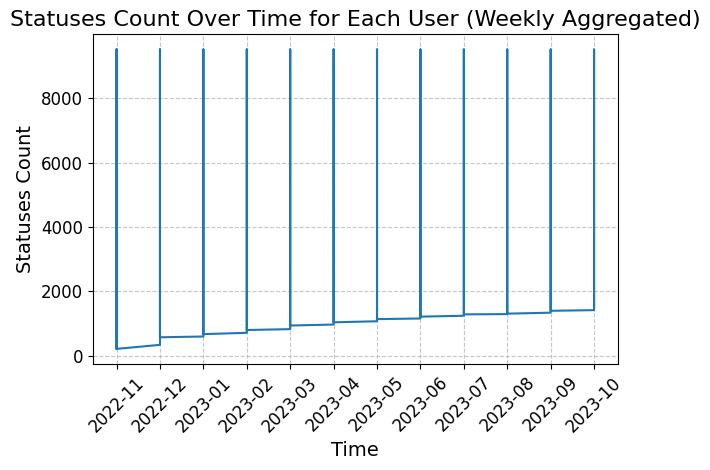

In [ ]:
from tqdm import tqdm

unique_users = data_total.loc[data_total['username']=='kerim']['username'].unique()

data_total['directory'] = pd.to_datetime(data_total['directory'], format='%Y%m%d%H%M')
data_total['directory'] = data_total['directory'].dt.strftime('%Y-%m')
for user in tqdm(unique_users):
    user_data = data_total[data_total['username'] == user]
    user_data.loc[:, 'statuses_count'] = pd.to_numeric(user_data['statuses_count'], errors='coerce')
    user_data = user_data.dropna(subset=['statuses_count'])
    user_data.set_index('directory', inplace=True)
    #user_data_resampled = user_data.resample('w').agg({'statuses_count': 'max'})
    #user_data_resampled = user_data_resampled.dropna(subset=['statuses_count'])
    plt.plot(user_data.index, user_data['statuses_count'].astype(int),  linestyle='-', label=user)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Statuses Count', fontsize=14)
plt.title('Statuses Count Over Time for Each User (Weekly Aggregated)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.legend(title='Username', fontsize=8, title_fontsize=11)
plt.tight_layout()

plt.show()

100%|██████████| 1/1 [00:00<00:00,  5.89it/s]


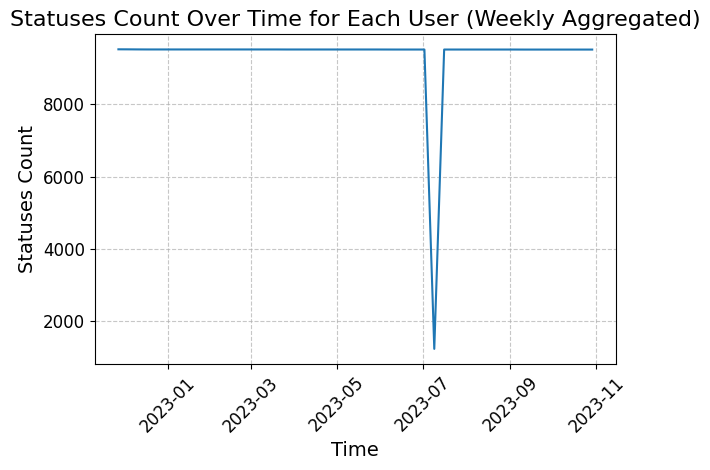

In [ ]:
from tqdm import tqdm

unique_users = data_total.loc[data_total['username']=='kerim']['username'].unique()

data_total['directory'] = pd.to_datetime(data_total['directory'], format='%Y%m%d%H%M')

for user in tqdm(unique_users):
    user_data = data_total[data_total['username'] == user]
    user_data.loc[:, 'statuses_count'] = pd.to_numeric(user_data['statuses_count'], errors='coerce')
    user_data = user_data.dropna(subset=['statuses_count'])
    user_data.set_index('directory', inplace=True)
    user_data_resampled = user_data.resample('w').agg({'statuses_count': 'max'})
    user_data_resampled = user_data_resampled.dropna(subset=['statuses_count'])
    plt.plot(user_data_resampled.index, user_data_resampled['statuses_count'].astype(int),  linestyle='-', label=user)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Statuses Count', fontsize=14)
plt.title('Statuses Count Over Time for Each User (Weekly Aggregated)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.legend(title='Username', fontsize=8, title_fontsize=11)
plt.tight_layout()

plt.show()

In [ ]:
unique_users[45:46]

array(['kerim'], dtype=object)

In [ ]:
data_total.loc[data_total['directory']=='202310270748']

In [ ]:
data_total.loc[data_total['username']=='kerim'].sort_values(by='directory')[['directory','statuses_count']]

,directory,statuses_count
50,202211230912,211
327,202211230912,9517
375,202211230912,211
10914,202212011434,336
11195,202212011434,9516
11241,202212011434,336
21780,202212081044,428
22058,202212081044,9514
32923,202212142033,9513
32971,202212142033,481


In [ ]:
data_total['username'].unique()[45:46]

array(['kerim'], dtype=object)

  0%|          | 0/1 [00:00<?, ?it/s]<ipython-input-7-408df73873ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['followers_count'] = pd.to_numeric(user_data['followers_count'], errors='coerce')
100%|██████████| 1/1 [00:00<00:00,  1.64it/s]


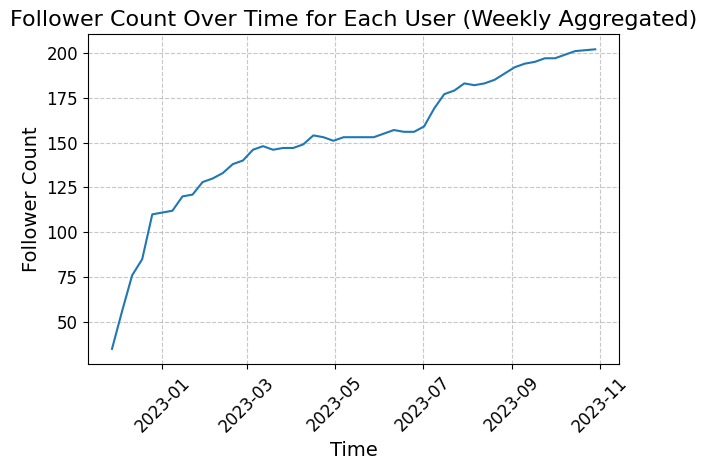

In [ ]:

unique_users = data_total['username'].unique()
data_total['directory'] = pd.to_datetime(data_total['directory'], format='%Y%m%d%H%M')
for user in tqdm(unique_users[45:46]):
    user_data = data_total[data_total['username'] == user]
    user_data['followers_count'] = pd.to_numeric(user_data['followers_count'], errors='coerce')
    if user_data['followers_count'].isna().any():
        continue
    user_data.set_index('directory', inplace=True)
    user_data_resampled = user_data.resample('w').agg({'followers_count': 'max'})
    user_data_resampled = user_data_resampled.dropna(subset=['followers_count'])
    plt.plot(user_data_resampled.index, user_data_resampled['followers_count'].astype(int), linestyle='-', label=user)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Follower Count', fontsize=14)
plt.title('Follower Count Over Time for Each User (Weekly Aggregated)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
#plt.legend(title='Username', fontsize=8, title_fontsize=11)
plt.tight_layout()

plt.show()